##Big_Hw OSDA

https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [457]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [458]:
!git clone https://github.com/EgorDudyrev/OSDA_course
%cd OSDA_course/lazy_fca
import lazy_pipeline as lpipe

Cloning into 'OSDA_course'...
remote: Enumerating objects: 512, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 512 (delta 28), reused 46 (delta 20), pack-reused 451
Receiving objects: 100% (512/512), 5.65 MiB | 21.76 MiB/s, done.
Resolving deltas: 100% (215/215), done.
/content/OSDA_course/lazy_fca/OSDA_course/lazy_fca/OSDA_course/lazy_fca/OSDA_course/lazy_fca/OSDA_course/lazy_fca/OSDA_course/lazy_fca/OSDA_course/lazy_fca/OSDA_course/lazy_fca/OSDA_course/lazy_fca


In [459]:
import numpy as np
import pandas as pd
import sklearn


In [460]:
test_df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/OSDA/heart.csv') 

In [461]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [462]:
test_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [463]:
test_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [464]:
test_size = 0.1
numerical_names = {'age', 'trtbps', 'chol', 'thalachh', 'oldpeak'}

In [465]:
test_df.describe(include='all')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [466]:
test_df['age'].min()

29

##Data Pre-Processing

In [467]:
new_data = dict()

In [468]:
new_data['age29_40'] = (test_df['age']<=40).astype(int)
new_data['age41_60'] = ((test_df['age']>40) & (test_df['age']<=60)).astype(int)
new_data['age61_77'] = (test_df['age']>60).astype(int)

In [469]:
new_data['male'] = (test_df['sex']==1).astype(int)
new_data['female'] = (test_df['sex']==0).astype(int)

In [470]:
new_data['cp0'] = (test_df['cp']==0).astype(int)
new_data['cp1'] = (test_df['cp']==1).astype(int)
new_data['cp2'] = (test_df['cp']==2).astype(int)
new_data['cp3'] = (test_df['cp']==3).astype(int)

In [471]:
new_data['trtbps94_120'] = (test_df['trtbps']<=120).astype(int)
new_data['trtbps121_200'] = ((test_df['trtbps']>120) & (test_df['trtbps']<=200)).astype(int)

In [472]:
new_data['chol126_146'] = (test_df['chol']<=146).astype(int)
new_data['chol146_300'] = ((test_df['chol']>146) & (test_df['chol']<=300)).astype(int)
new_data['chol300_564'] = ((test_df['chol']>300) & (test_df['chol']<=564)).astype(int)

In [473]:
new_data['fbs0'] = (test_df['fbs']==0 ).astype(int)
new_data['fbs1'] = (test_df['fbs']==1 ).astype(int)

In [474]:
new_data['restecg0'] = (test_df['restecg']==0 ).astype(int)
new_data['restecg1'] = (test_df['restecg']==1 ).astype(int)
new_data['restecg2'] = (test_df['restecg']==2 ).astype(int)

In [475]:
new_data['thalach71_100'] = (test_df['thalachh']<=100 ).astype(int)
new_data['thalach100_150'] = ((test_df['thalachh']>100) & (test_df['chol']<=150)).astype(int)
new_data['thalach150_202'] = ((test_df['thalachh']>150) & (test_df['chol']<=202)).astype(int)

In [476]:
new_data['exang0'] = (test_df['exng'] == 0).astype(int)
new_data['exang1'] = (test_df['exng'] == 1).astype(int)

In [477]:
new_data['oldpeak0_2'] = (test_df['oldpeak'] <=2 ).astype(int)
new_data['oldpeak2.1_4'] = ((test_df['oldpeak']>2) & (test_df['oldpeak']<=4)).astype(int)
new_data['oldpeak4.1_6.2'] = (test_df['oldpeak']>4).astype(int)


In [478]:
new_data['slope0'] = (test_df['slp'] == 0).astype(int)
new_data['slope1'] = (test_df['slp'] == 1).astype(int)
new_data['slope2'] = (test_df['slp'] == 2).astype(int)

In [479]:
new_data['caa0'] = (test_df['caa'] == 0).astype(int)
new_data['caa1'] = (test_df['caa'] == 1).astype(int)
new_data['caa2'] = (test_df['caa'] == 2).astype(int)
new_data['caa3'] = (test_df['caa'] == 3).astype(int)
new_data['caa4'] = (test_df['caa'] == 4).astype(int)


In [480]:
new_data['thal0'] = (test_df['thall'] == 0).astype(int)
new_data['thal1'] = (test_df['thall'] == 1).astype(int)
new_data['thal2'] = (test_df['thall'] == 2).astype(int)
new_data['thal3'] = (test_df['thall'] == 3).astype(int)

In [481]:
new_data['output'] = test_df['output'].astype(bool)


In [482]:
df = pd.DataFrame(new_data)

In [483]:
df = df.sample(frac=1).reset_index(drop=True)

In [484]:
df

,age29_40,age41_60,age61_77,male,female,cp0,cp1,cp2,cp3,trtbps94_120,...,caa0,caa1,caa2,caa3,caa4,thal0,thal1,thal2,thal3,output
0,0,1,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,True
1,0,1,0,1,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,True
2,0,1,0,0,1,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,True
3,1,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,True
4,0,1,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,1,0,0,1,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,True
299,0,1,0,1,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,False
300,0,1,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,True
301,0,1,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,True


In [485]:
df = df.sample(frac=1).reset_index(drop=True)

In [486]:
y_name = 'output'

##Data binarization: one-hot encoding

In [487]:
y = df[y_name]
X = lpipe.binarize_X(df.drop(y_name, axis=1))
print(X.shape)
X.head()

(303, 78)


,age29_40: 0,age29_40: 1,age41_60: 0,age41_60: 1,age61_77: 0,age61_77: 1,male: 0,male: 1,female: 0,female: 1,...,caa4: 0,caa4: 1,thal0: 0,thal0: 1,thal1: 0,thal1: 1,thal2: 0,thal2: 1,thal3: 0,thal3: 1
0,True,False,True,False,False,True,True,False,False,True,...,True,False,True,False,True,False,False,True,True,False
1,True,False,True,False,False,True,False,True,True,False,...,True,False,True,False,True,False,False,True,True,False
2,True,False,True,False,False,True,False,True,True,False,...,True,False,True,False,False,True,True,False,True,False
3,True,False,False,True,True,False,False,True,True,False,...,True,False,True,False,True,False,False,True,True,False
4,True,False,False,True,True,False,False,True,True,False,...,True,False,True,False,False,True,True,False,True,False


In [488]:
X = X.sample(frac=1, random_state=42)  # Shuffle X
y = y[X.index]  # Order y to follow the order of rows from X

In [489]:
X

,age29_40: 0,age29_40: 1,age41_60: 0,age41_60: 1,age61_77: 0,age61_77: 1,male: 0,male: 1,female: 0,female: 1,...,caa4: 0,caa4: 1,thal0: 0,thal0: 1,thal1: 0,thal1: 1,thal2: 0,thal2: 1,thal3: 0,thal3: 1
179,True,False,False,True,True,False,False,True,True,False,...,True,False,True,False,True,False,False,True,True,False
228,True,False,True,False,False,True,True,False,False,True,...,True,False,True,False,True,False,False,True,True,False
111,True,False,True,False,False,True,False,True,True,False,...,True,False,True,False,True,False,False,True,True,False
246,True,False,False,True,True,False,False,True,True,False,...,True,False,True,False,True,False,True,False,False,True
60,True,False,False,True,True,False,False,True,True,False,...,True,False,True,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,True,False,True,False,False,True,False,True,True,False,...,True,False,True,False,True,False,False,True,True,False
71,True,False,False,True,True,False,False,True,True,False,...,True,False,True,False,True,False,False,True,True,False
106,True,False,False,True,True,False,True,False,False,True,...,True,False,True,False,True,False,True,False,False,True
270,True,False,True,False,False,True,False,True,True,False,...,True,False,True,False,True,False,True,False,False,True


In [490]:
X_bin = [set(X.columns[x]) for idx, x in X.iterrows()]
X_bin[0]

{'age29_40: 0',
 'age41_60: 1',
 'age61_77: 0',
 'caa0: 1',
 'caa1: 0',
 'caa2: 0',
 'caa3: 0',
 'caa4: 0',
 'chol126_146: 0',
 'chol146_300: 1',
 'chol300_564: 0',
 'cp0: 0',
 'cp1: 0',
 'cp2: 1',
 'cp3: 0',
 'exang0: 1',
 'exang1: 0',
 'fbs0: 1',
 'fbs1: 0',
 'female: 0',
 'male: 1',
 'oldpeak0_2: 1',
 'oldpeak2.1_4: 0',
 'oldpeak4.1_6.2: 0',
 'restecg0: 0',
 'restecg1: 1',
 'restecg2: 0',
 'slope0: 0',
 'slope1: 0',
 'slope2: 1',
 'thal0: 0',
 'thal1: 0',
 'thal2: 1',
 'thal3: 0',
 'thalach100_150: 0',
 'thalach150_202: 0',
 'thalach71_100: 0',
 'trtbps121_200: 0',
 'trtbps94_120: 1'}

In [491]:
y = y.values.tolist()

In [492]:
n_train = int(len(X)*0.1)
n_test = len(X) - n_train
n_train, n_test

(30, 273)

In [493]:
y_test = y[n_train:]

In [494]:
X_bin

[{'age29_40: 0',
  'age41_60: 1',
  'age61_77: 0',
  'caa0: 1',
  'caa1: 0',
  'caa2: 0',
  'caa3: 0',
  'caa4: 0',
  'chol126_146: 0',
  'chol146_300: 1',
  'chol300_564: 0',
  'cp0: 0',
  'cp1: 0',
  'cp2: 1',
  'cp3: 0',
  'exang0: 1',
  'exang1: 0',
  'fbs0: 1',
  'fbs1: 0',
  'female: 0',
  'male: 1',
  'oldpeak0_2: 1',
  'oldpeak2.1_4: 0',
  'oldpeak4.1_6.2: 0',
  'restecg0: 0',
  'restecg1: 1',
  'restecg2: 0',
  'slope0: 0',
  'slope1: 0',
  'slope2: 1',
  'thal0: 0',
  'thal1: 0',
  'thal2: 1',
  'thal3: 0',
  'thalach100_150: 0',
  'thalach150_202: 0',
  'thalach71_100: 0',
  'trtbps121_200: 0',
  'trtbps94_120: 1'},
 {'age29_40: 0',
  'age41_60: 0',
  'age61_77: 1',
  'caa0: 1',
  'caa1: 0',
  'caa2: 0',
  'caa3: 0',
  'caa4: 0',
  'chol126_146: 0',
  'chol146_300: 1',
  'chol300_564: 0',
  'cp0: 1',
  'cp1: 0',
  'cp2: 0',
  'cp3: 0',
  'exang0: 0',
  'exang1: 1',
  'fbs0: 1',
  'fbs1: 0',
  'female: 1',
  'male: 0',
  'oldpeak0_2: 1',
  'oldpeak2.1_4: 0',
  'oldpeak4.1_6.2

##Make prediction


In [502]:
%time
gen = lpipe.predict_array(X_bin, y, n_train, use_tqdm=True)
y_preds, t_preds = lpipe.apply_stopwatch(gen)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.25 µs


Predicting step by step: 100%|██████████| 303/303 [00:01<00:00, 18.11it/s]


In [503]:
%%time
gen = list(lpipe.predict_array(X_bin, y, n_train, use_tqdm=True, update_train=False))
y_preds_fixedtrain, t_preds_fixedtrain = lpipe.apply_stopwatch(gen)

Predicting step by step: 100%|██████████| 303/303 [00:01<00:00, 20.18it/s]

CPU times: user 1.53 s, sys: 6.69 ms, total: 1.53 s
Wall time: 1.54 s


In [504]:

from sklearn.metrics import accuracy_score, f1_score

score_vals = {}
for score_f in [accuracy_score, f1_score]:
    score_name = score_f.__name__
    preds = y_preds
    score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
    
    score_name = score_f.__name__ + '_fixedtrain'
    preds = y_preds_fixedtrain
    score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


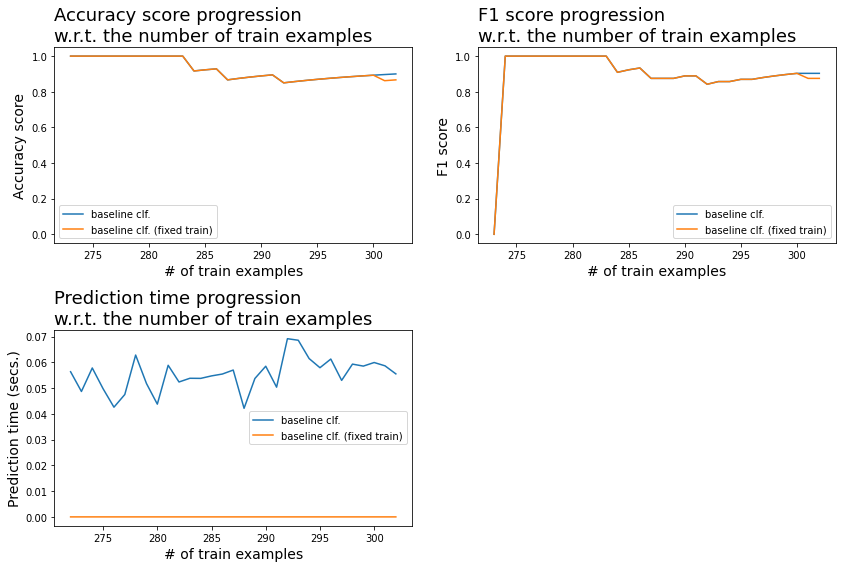

In [505]:
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = (1,1,1,1) 


fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for ax, t in zip(axs[0],['accuracy_score', 'f1_score']):
    ax.set_ylim(0-0.05, 1+0.05)
    ax.plot(range(n_train+1, len(X)), score_vals[t], label='baseline clf.')
    ax.plot(range(n_train+1, len(X)), score_vals[t+'_fixedtrain'], label='baseline clf. (fixed train)')
    
axs[1,0].plot(range(n_train, len(X)), t_preds, label='baseline clf.')
axs[1,0].plot(range(n_train, len(X)), t_preds_fixedtrain, label='baseline clf. (fixed train)')

for (ax, t_verb, dim) in zip(axs.flatten(), ['Accuracy score', 'F1 score', 'Prediction time'], ['','','(secs.)']):
    ax.set_title('\n'.join([f"{t_verb} progression", "w.r.t. the number of train examples"]), loc='left', size=18)
    ax.set_xlabel('# of train examples', size=14)
    ax.set_ylabel(f"{t_verb} {dim}".strip(), size=14)
    ax.legend()
    
axs[1,1].set_axis_off()    

plt.tight_layout()
plt.subplots_adjust()

plt.savefig('Classifier_comparison.png')
plt.show()


In [506]:
sum(score_vals['accuracy_score'])/len(score_vals['accuracy_score'])*100

92.78072645274061

In [507]:
sum(score_vals['f1_score'])/len(score_vals['f1_score'])*100

89.46306129295606

In [508]:
n_train = int(len(X)*0.9)
n_test = len(X) - n_train
X_train = X[:n_train]
X_test = X[n_train:]
y_train = y[:n_train]
y_test = y[n_train:]

##Random Forest

In [509]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier(n_estimators=100)
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)

from sklearn import metrics

acc =  metrics.accuracy_score(y_test, y_pred) * 100




In [510]:
acc

87.09677419354838

##Decision Tree

In [515]:
from sklearn import tree
from sklearn.metrics import accuracy_score
DF = tree.DecisionTreeClassifier(random_state=42)
DF = DF.fit(X_train, y_train)
y_pred = DF.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100

In [516]:
acc

83.87096774193549

##KNN

In [513]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
acc = knn.score(X_train, y_train) * 100



In [514]:
acc 

87.86764705882352